In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv('../data/Diabetes.csv')

In [33]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [34]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
# let's check the number of missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
# let's see the duplicates values
df.duplicated().sum()

np.int64(0)

In [38]:
# Statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
# Handle 0 values in specified columns by replacing them with NaN because they are not valid measurements as per the dataset context gulcose, blood pressure, skin thickness, insulin, and BMI cannot be zero.
# We will replace 0 values in these columns with NaN to indicate missing data.
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)



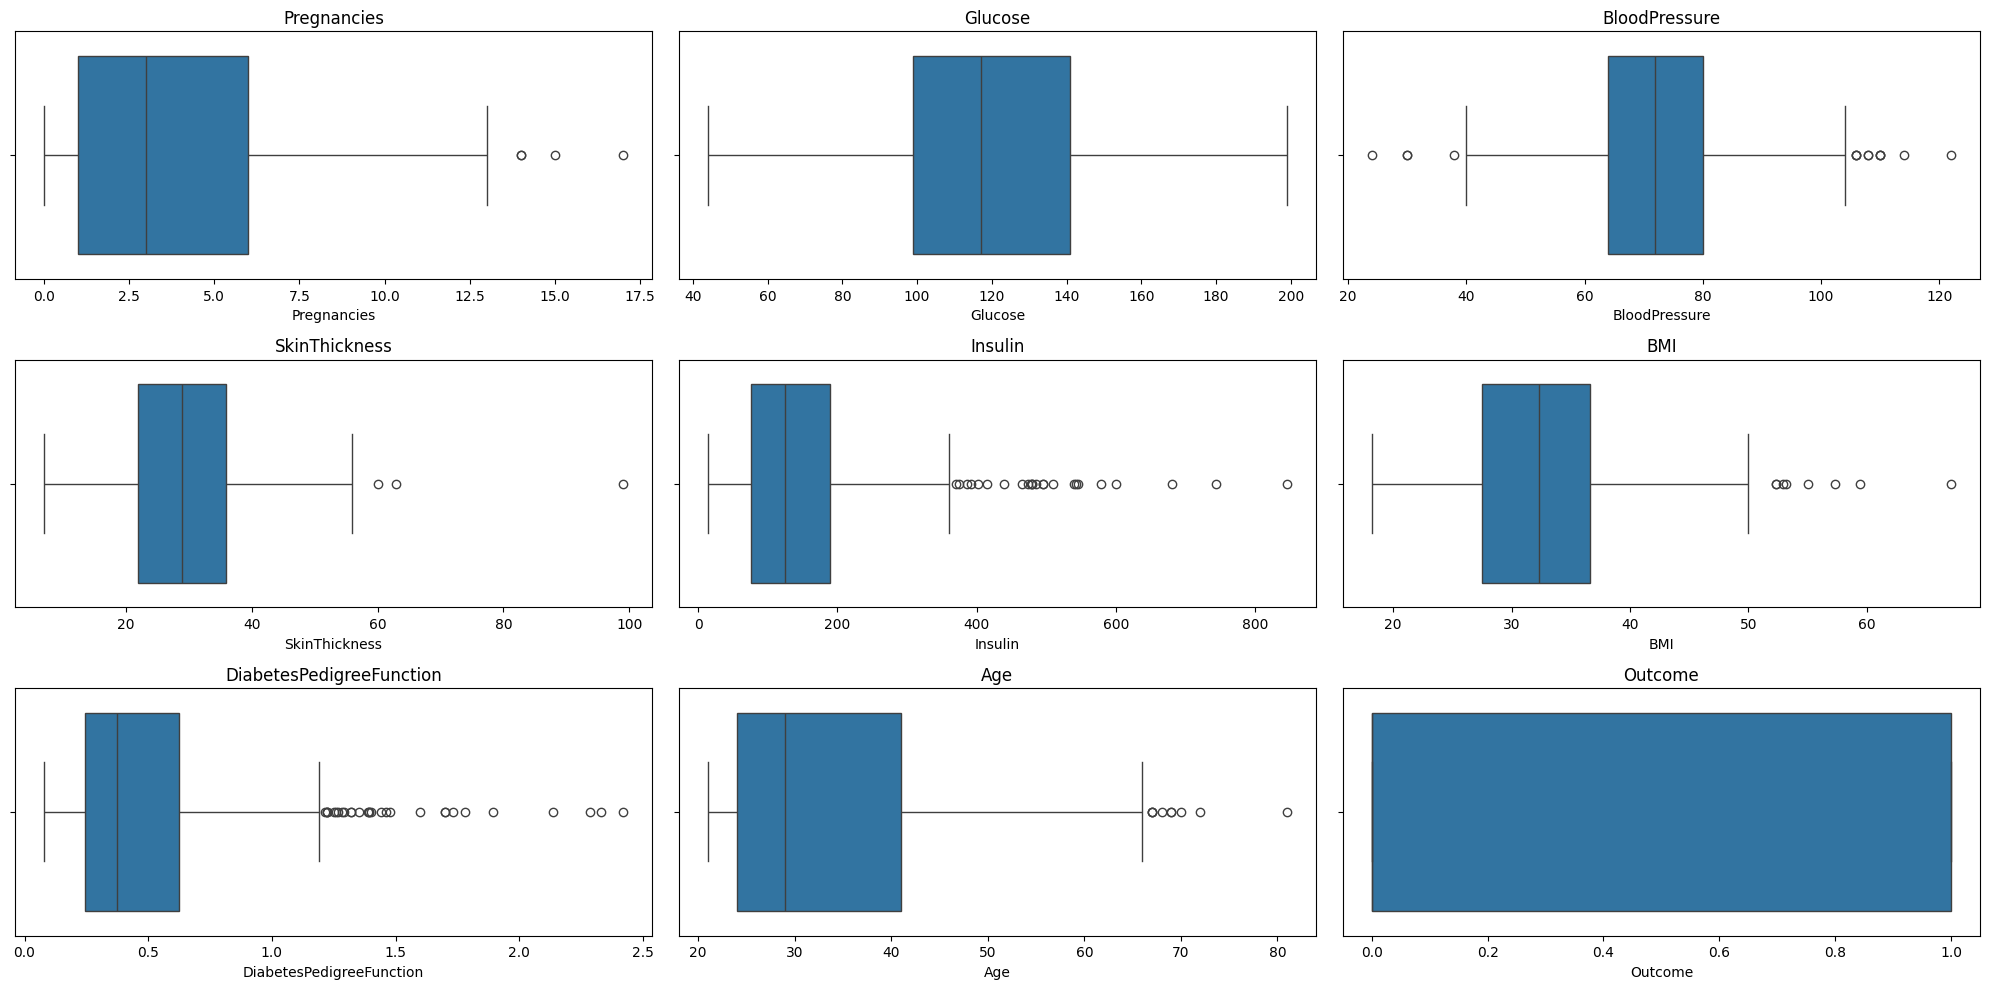

In [40]:
# Lets visualize the outliers using boxplot for all the columns using a function
def boxplot(df):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(df.columns):
        plt.subplot(3, 3, i + 1)  # 3x3 grid for 9 columns
        sns.boxplot(x=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
    
boxplot(df)

In [41]:
# Lets count the number of outliers in each column
def count_outliers(df):
    outliers_count = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    return outliers_count
outliers_count = count_outliers(df)
print("Number of outliers in each column:")
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")
    

Number of outliers in each column:
Pregnancies: 4 outliers
Glucose: 0 outliers
BloodPressure: 14 outliers
SkinThickness: 3 outliers
Insulin: 24 outliers
BMI: 8 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers
Outcome: 0 outliers


In [42]:
# Now lets handel the outliers using IQR method form the dataframe
def remove_outliers_iqr(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers_iqr(df)




In [43]:
# let's again check the number of outliers in each column after removing themoutliers_count_after = count_outliers(df)
outliers_count_after = count_outliers(df)
print("Number of outliers in each column after removing them:")
for col, count in outliers_count_after.items():
    print(f"{col}: {count} outliers")
    

    

Number of outliers in each column after removing them:
Pregnancies: 22 outliers
Glucose: 2 outliers
BloodPressure: 0 outliers
SkinThickness: 0 outliers
Insulin: 9 outliers
BMI: 0 outliers
DiabetesPedigreeFunction: 3 outliers
Age: 9 outliers
Outcome: 0 outliers


In [44]:
# For remaining outliers, we can use capping method
def cap_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

df = cap_outliers(df)


In [45]:
# let's again check the number of outliers in each column after removing 
outliers_count_after = count_outliers(df)
print("Number of outliers in each column after removing them:")
for col, count in outliers_count_after.items():
    print(f"{col}: {count} outliers")
    

Number of outliers in each column after removing them:
Pregnancies: 0 outliers
Glucose: 0 outliers
BloodPressure: 0 outliers
SkinThickness: 0 outliers
Insulin: 0 outliers
BMI: 0 outliers
DiabetesPedigreeFunction: 0 outliers
Age: 0 outliers
Outcome: 0 outliers


In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,50.5,1.0
16,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0,1.0
19,1.0,115.0,70.0,30.0,96.0,34.6,0.529,32.0,1.0


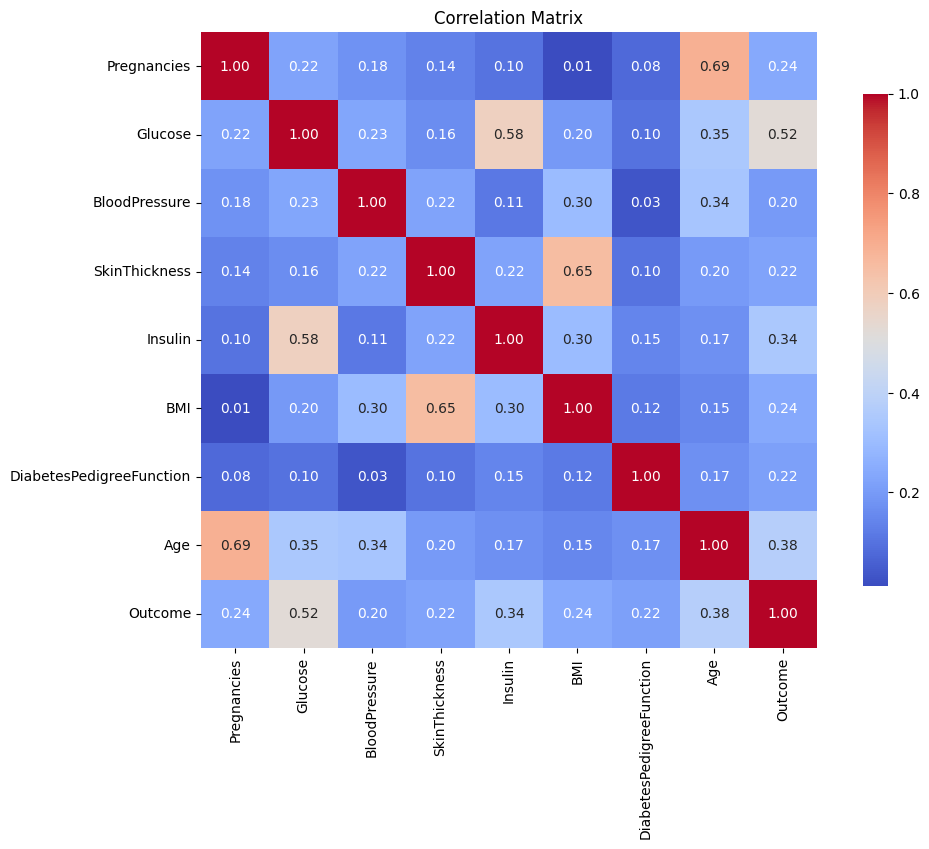

In [47]:
# now lets use the correlation matrix to see the correlation between the columns

corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


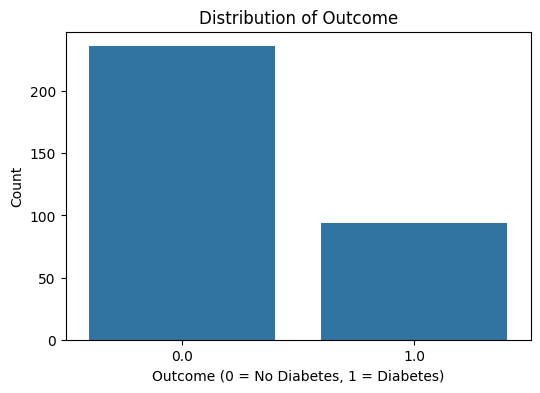

Outoff the total number of patients: 330
Number of patients with diabetes (1): 94
Number of patients without diabetes (0): 236


In [48]:
# Count plot for Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

# show the number of patients with diabetes and without diabetes
diabetes_counts = df['Outcome'].value_counts()
print('Outoff the total number of patients:', len(df))
print("Number of patients with diabetes (1):", diabetes_counts[1])
print("Number of patients without diabetes (0):", diabetes_counts[0])



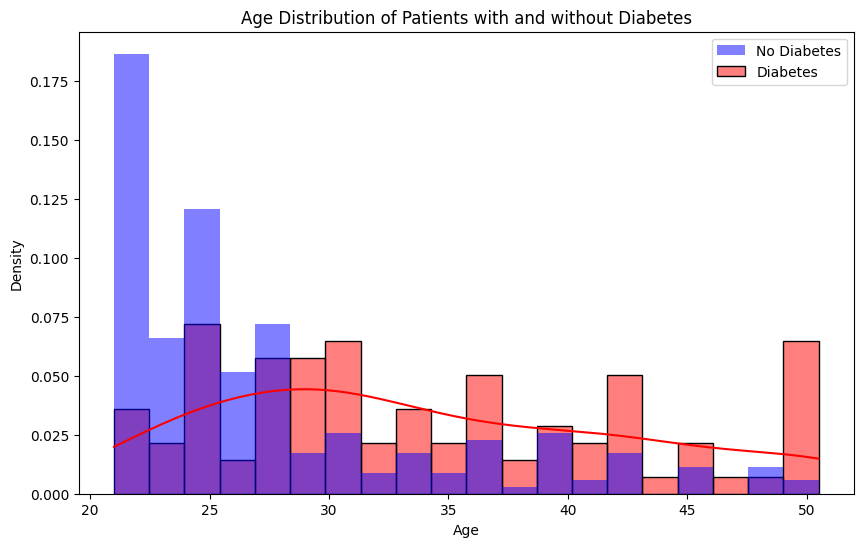

In [49]:
# Lets visualize the how many patients are having diabetes based on the age
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Outcome'] == 1]['Age'], bins=20, kde=True, color='red', label='Diabetes', stat='density')
plt.hist(df[df['Outcome'] == 0]['Age'], bins=20, alpha=0.5, color='blue', label='No Diabetes', density=True)
plt.title('Age Distribution of Patients with and without Diabetes')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()



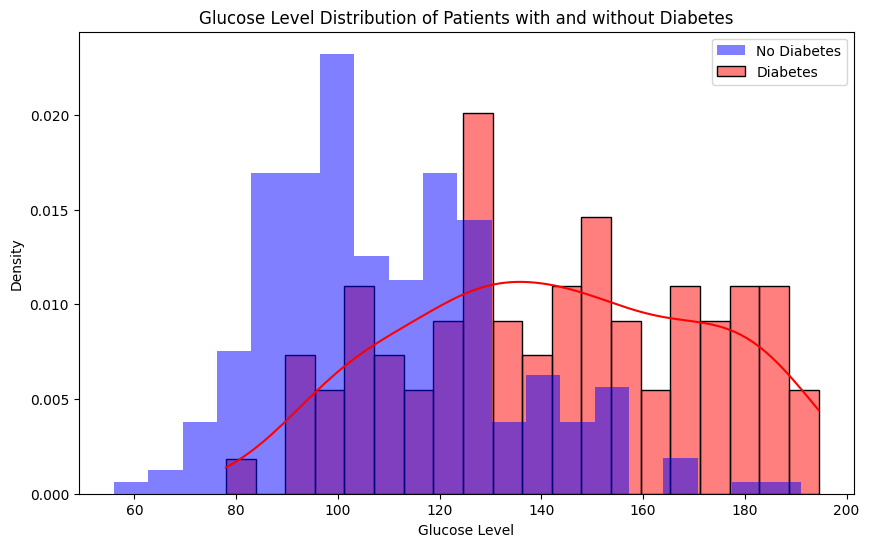

In [50]:
# Visualize the gulucose level distribution for patients with and without diabetes
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Outcome'] == 1]['Glucose'], bins=20, kde=True, color='red', label='Diabetes', stat='density')
plt.hist(df[df['Outcome'] == 0]['Glucose'], bins=20, alpha=0.5, color='blue', label='No Diabetes', density=True)
plt.title('Glucose Level Distribution of Patients with and without Diabetes')
plt.xlabel('Glucose Level')
plt.ylabel('Density')
plt.legend()
plt.show()

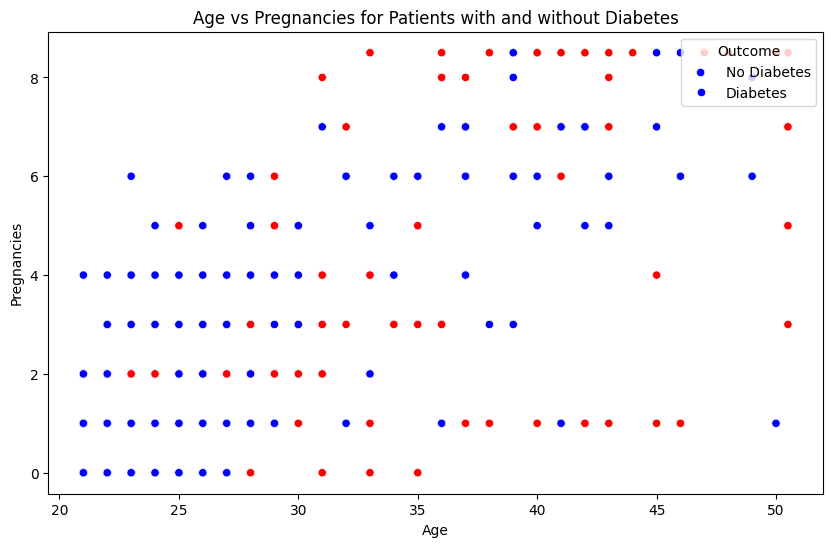

In [51]:
# Age and Pregnancies  visualization for patients with and without diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pregnancies', hue='Outcome', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Age vs Pregnancies for Patients with and without Diabetes')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.legend(title='Outcome', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.show()



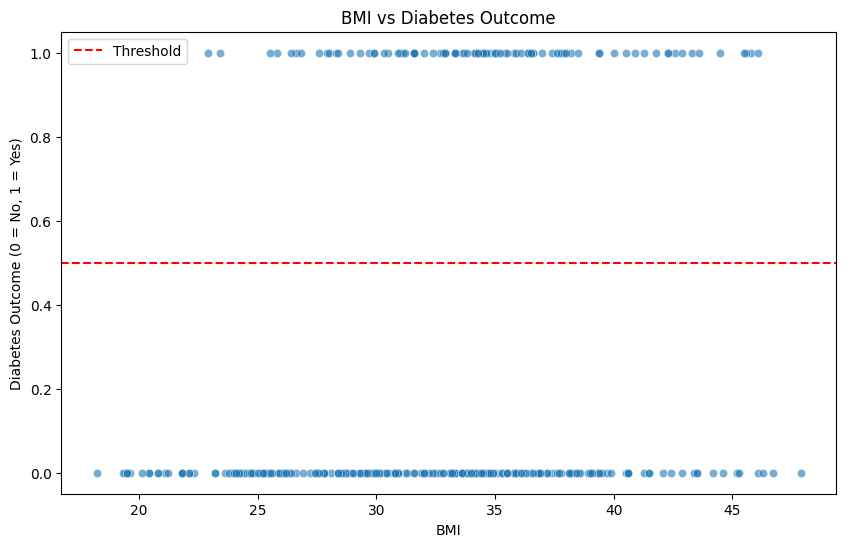

In [52]:
# Visualize the relationship between BMI and Diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Outcome', data=df, alpha=0.6)
plt.title('BMI vs Diabetes Outcome')
plt.xlabel('BMI')
plt.ylabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.show()


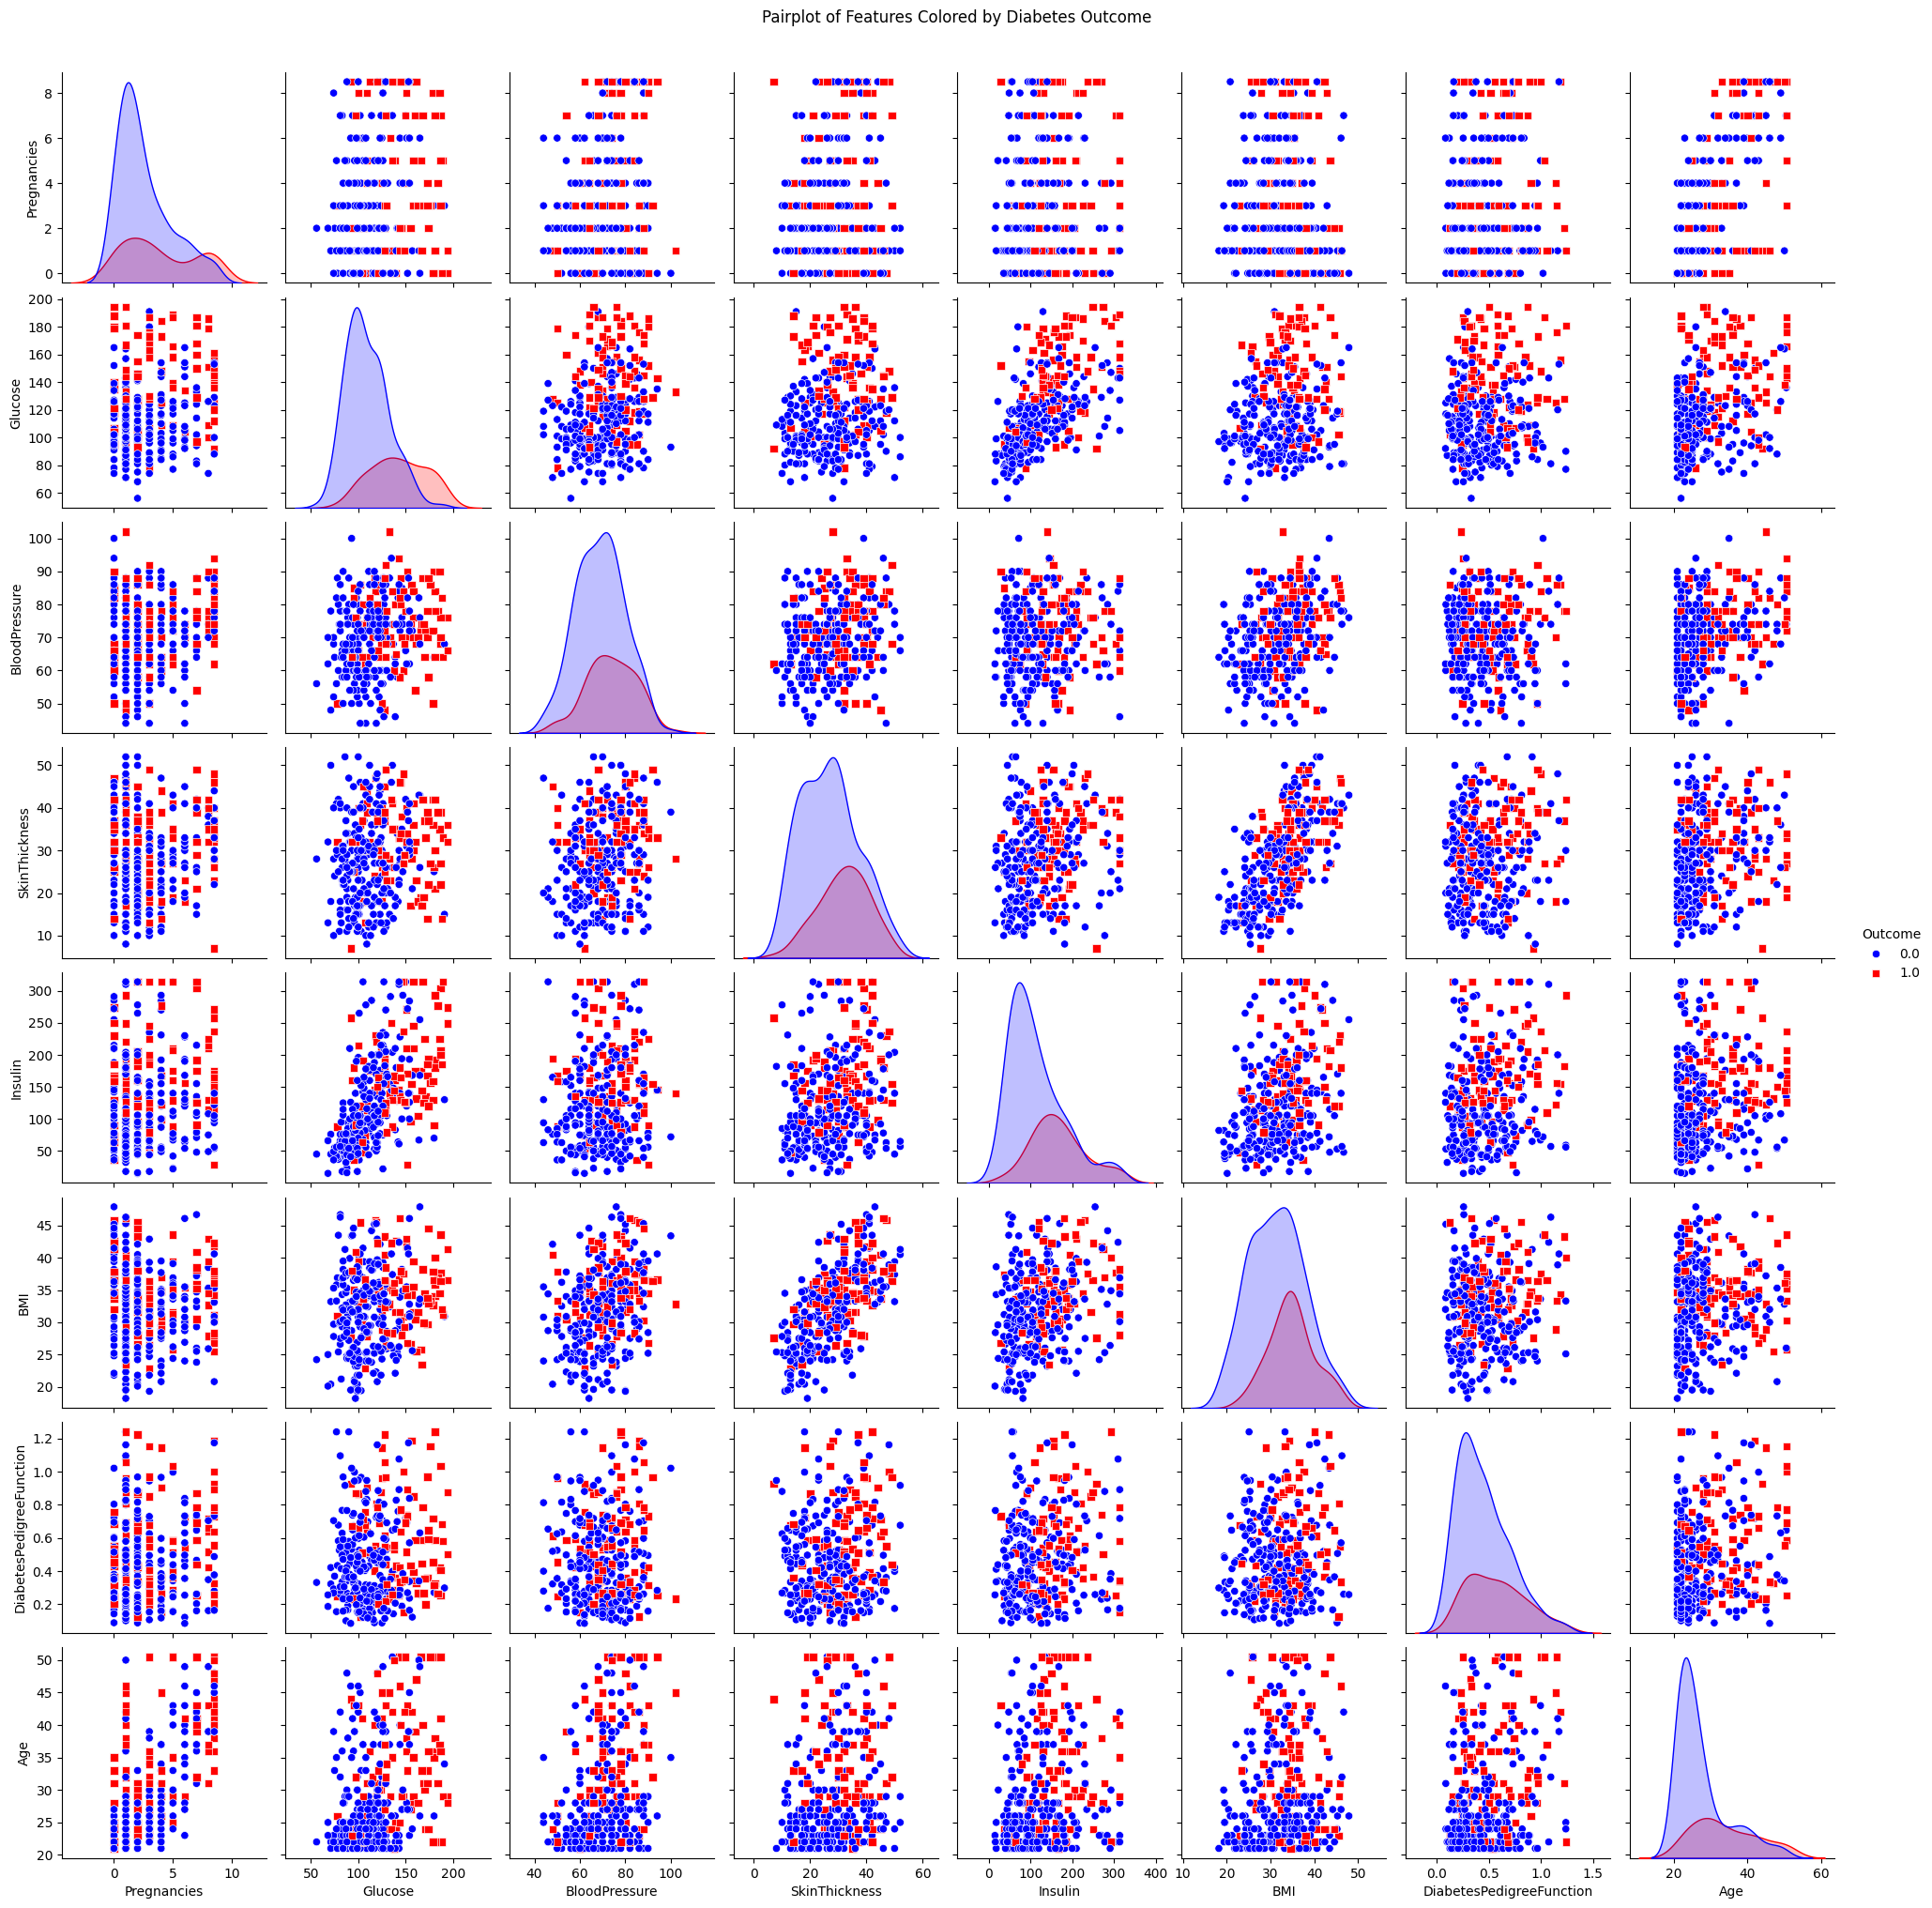

In [53]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"], palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot of Features Colored by Diabetes Outcome', y=1.02)
plt.show()

In [54]:
# Now shave the cleaned dataset to a new CSV file
df.to_csv('../data/Diabetes_Cleaned.csv', index=False)